# Credit Card Fraud Detection

### TABLE OF CONTENTS


1. Importing Libraries

2. Loading Dataset

3. Data Description

4. Exploratory Data Analysis

5. Data Visualization

6. Data Preprocessing

7. Model Training and Evaluation

8. Estimating Importance of Features

9. PCA Visualization

10. AUC-ROC Curve

11. Conclusion

# Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading Dataset

In [2]:
data=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df=data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Description

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Exploratory Data Analysis

In [3]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# check for missing values
total =df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

# there is no missing values in the dataset

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


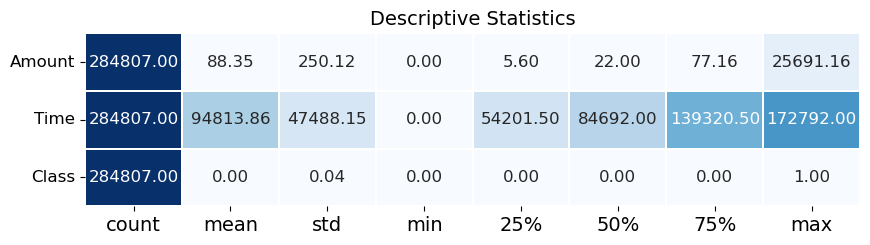

In [5]:
# statistical summary:
cols =df[["Amount","Time","Class"]]
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

In [6]:
# correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='summer_r')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


In [7]:
# check for class imbalance
temp = df["Class"].value_counts()
df1 = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df1['Class'],y = df1['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Blue"),
    text=df1['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

In [8]:
# making Hour feature from Time feature
df["Hour"] = df["Time"].apply(lambda x: np.ceil(float(x)/3600) % 24)
df["Hour"] = df["Hour"].astype("int")

# Data Visualization

In [9]:
# Distribution of Fraud and Normal Transactions

px.pie(df, names="Class", title="Distribution of Fraud and Normal Transactions:(Normal:0 | Fraud:1)", color_discrete_sequence=['#1E90FF', '#FF4500'],
       template="plotly_dark", width=800, height=600)

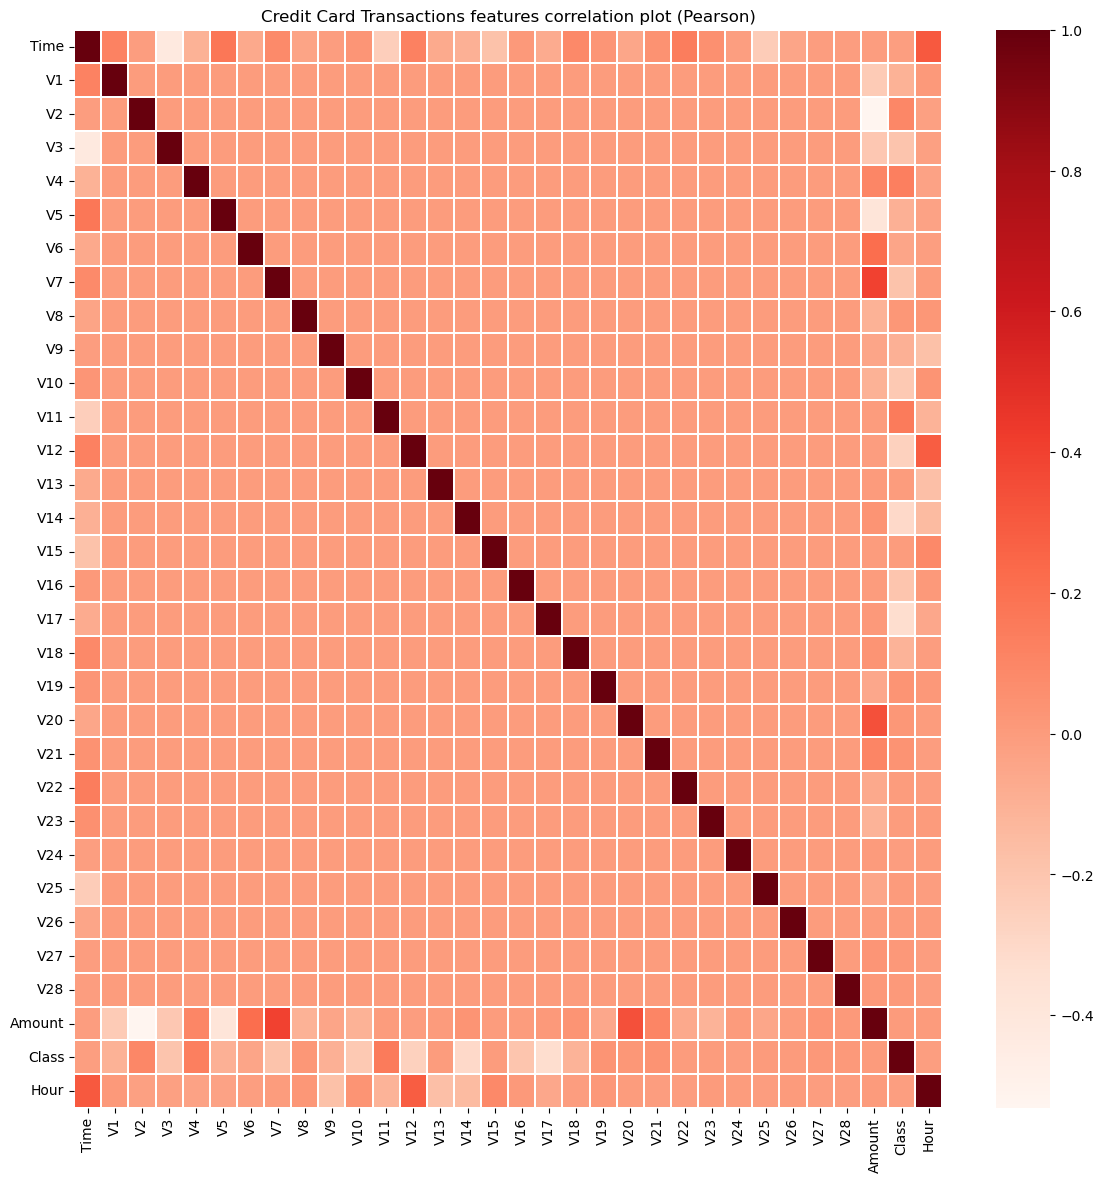

In [10]:
# correlation heatmap:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [11]:
# time vs fraud

# Transaction count with non frauds over time(Hour)
count_0 = df[df['Class']==0].groupby('Hour').count()["Class"]

# Transaction count with frauds over time(Hour)
count_1 = df[df['Class']==1].groupby('Hour').count()["Class"]

# Concatenate
counts_df = pd.concat([count_0, count_1], axis=1, keys=["Class 0", "Class 1"]).fillna(0)
df_counts = counts_df.reset_index()


# Subplots
fig = make_subplots(
    rows=1, cols=2,

    subplot_titles=("Non Frauds","Frauds"))
fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Class 0"], name="Transactions", marker = {'color' : "#1E90FF"}),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Class 1"], name="Transactions", marker = {'color' : "#FF4500"}),
                 row=1, col=2)

fig['layout']['xaxis']['title']='Hour'
fig['layout']['yaxis']['title']='Transaction'
fig['layout']['xaxis2']['title']='Hour'
fig['layout']['yaxis2']['title']='Transaction'

fig.show()

# Data Preprocessing

In [12]:
X=df.drop(["Class"],axis=1).values
y=df["Class"].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
# standardization of data
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Model Training and Evaluation

In [14]:
# model building

knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
lgb=LGBMClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
lr=LogisticRegression()


models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

KNeighborsClassifier Model Test Accuracy Score is:  0.9995084442259752
KNeighborsClassifier Model Test F1 Score is:  0.8426966292134831
KNeighborsClassifier Mean_absolute_error:  0.0004915557740247885
KNeighborsClassifier Mean_squared_error:  0.0004915557740247885
KNeighborsClassifier Root_mean_squared_error:  0.02217105712465665
KNeighborsClassifier R2_score:  0.7137933113594341
KNeighborsClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.77      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



SVC Model Test Accuracy Score is:  0.9993153330290369
SVC Model Test F1 Score is:  0.7577639751552796
SVC Mean_absolute_error:  0.0006846669709630982
SVC Mean_squared_error:  0.0006846669709630982
SVC Root_mean_squared_error:  0.026166141690419285
SVC R2_score:  0.6013549693934976
SVC Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.62      0.76        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg       1.00      1.00      1.00     56962



GaussianNB Model Test Accuracy Score is:  0.9778448790421684
GaussianNB Model Test F1 Score is:  0.11251758087201125
GaussianNB Mean_absolute_error:  0.022155120957831537
GaussianNB Mean_squared_error:  0.022155120957831537
GaussianNB Root_mean_squared_error:  0.14884596386140786
GaussianNB R2_score:  -11.899744323728362
GaussianNB Classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.82      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



DecisionTreeClassifier Model Test Accuracy Score is:  0.9991924440855307
DecisionTreeClassifier Model Test F1 Score is:  0.7700000000000001
DecisionTreeClassifier Mean_absolute_error:  0.0008075559144692953
DecisionTreeClassifier Mean_squared_error:  0.0008075559144692953
DecisionTreeClassifier Root_mean_squared_error:  0.028417528296269808
DecisionTreeClassifier R2_score:  0.5298032972333562
DecisionTreeClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.79      0.77        98

    accuracy                           1.00     56962
   macro avg       0.88      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962



RandomForestClassifier Model Test Accuracy Score is:  0.9995786664794073
RandomForestClassifier Model Test F1 Score is:  0.8636363636363635
RandomForestClassifier Mean_absolute_error:  0.0004213335205926758
RandomForestClassifier Mean_squared_error:  0.0004213335205926758
RandomForestClassifier Root_mean_squared_error:  0.020526410319212558
RandomForestClassifier R2_score:  0.7546799811652293
RandomForestClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



XGBClassifier Model Test Accuracy Score is:  0.9996313331694814
XGBClassifier Model Test F1 Score is:  0.88268156424581
XGBClassifier Mean_absolute_error:  0.0003686668305185913
XGBClassifier Mean_squared_error:  0.0003686668305185913
XGBClassifier Root_mean_squared_error:  0.01920069869870863
XGBClassifier R2_score:  0.7853449835195756
XGBClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



LGBMClassifier Model Test Accuracy Score is:  0.9972086654260736
LGBMClassifier Model Test F1 Score is:  0.2933333333333333
LGBMClassifier Mean_absolute_error:  0.0027913345739264774
LGBMClassifier Mean_squared_error:  0.0027913345739264774
LGBMClassifier Root_mean_squared_error:  0.05283308219218785
LGBMClassifier R2_score:  -0.6252451247803561
LGBMClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.34      0.29        98

    accuracy                           1.00     56962
   macro avg       0.63      0.67      0.65     56962
weighted avg       1.00      1.00      1.00     56962



GradientBoostingClassifier Model Test Accuracy Score is:  0.9989466661985184
GradientBoostingClassifier Model Test F1 Score is:  0.6629213483146067
GradientBoostingClassifier Mean_absolute_error:  0.0010533338014816894
GradientBoostingClassifier Mean_squared_error:  0.0010533338014816894
GradientBoostingClassifier Root_mean_squared_error:  0.032455104397947784
GradientBoostingClassifier R2_score:  0.38669995291307313
GradientBoostingClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



AdaBoostClassifier Model Test Accuracy Score is:  0.9993153330290369
AdaBoostClassifier Model Test F1 Score is:  0.7845303867403315
AdaBoostClassifier Mean_absolute_error:  0.0006846669709630982
AdaBoostClassifier Mean_squared_error:  0.0006846669709630982
AdaBoostClassifier Root_mean_squared_error:  0.026166141690419285
AdaBoostClassifier R2_score:  0.6013549693934976
AdaBoostClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.72      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



LogisticRegression Model Test Accuracy Score is:  0.9991222218320986
LogisticRegression Model Test F1 Score is:  0.6951219512195121
LogisticRegression Mean_absolute_error:  0.0008777781679014079
LogisticRegression Mean_squared_error:  0.0008777781679014079
LogisticRegression Root_mean_squared_error:  0.029627321308235206
LogisticRegression R2_score:  0.4889166274275609
LogisticRegression Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [15]:
# comparing all model accuracy:   

models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]

fig=px.bar(x=[type(model).__name__ for model in models], y=[accuracy_score(y_test, model.predict(X_test)) for model in models],
         color=[accuracy_score(y_test, model.predict(X_test)) for model in models], color_continuous_scale="Viridis",
            title="Model Comparison", labels=dict(x="Model", y="Accuracy"), template="plotly_dark", width=800,
            height=600,text=[accuracy_score(y_test, model.predict(X_test)) for model in models])
#fig.update_layout(yaxis_range=[0.97,0.99]) 
fig.show()

# Estimating Importance of Features

RandomForestClassifier Model Feature Importance: 



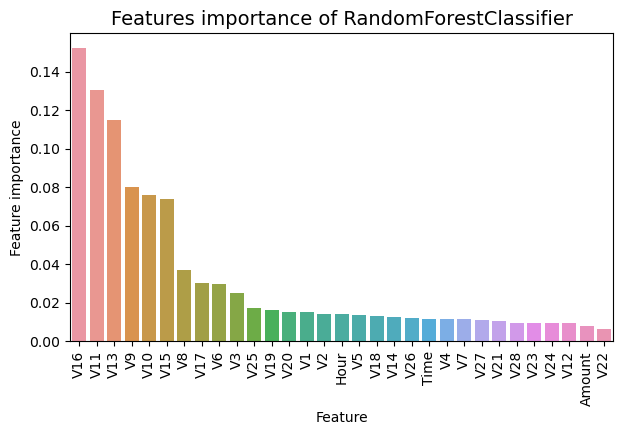

XGBClassifier Model Feature Importance: 



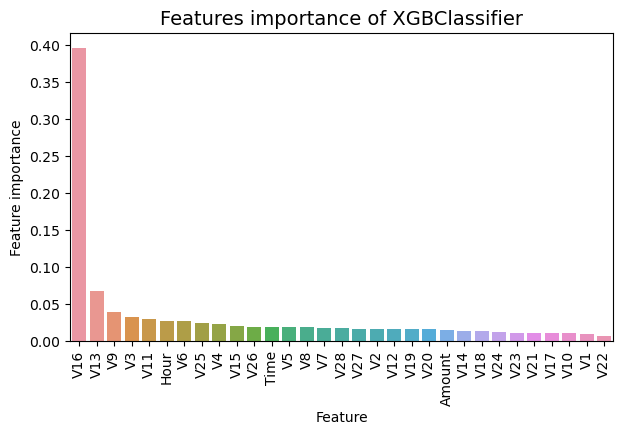

LGBMClassifier Model Feature Importance: 



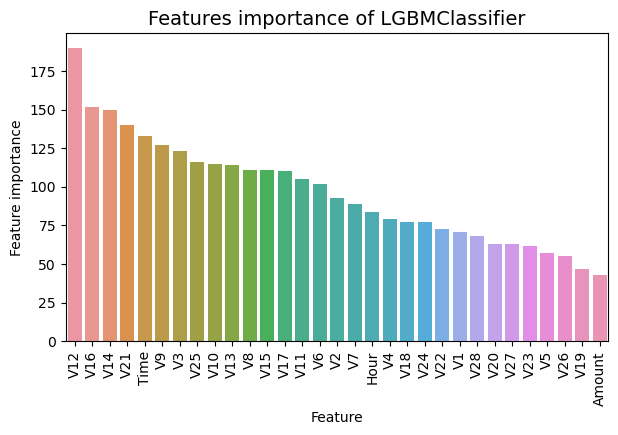

GradientBoostingClassifier Model Feature Importance: 



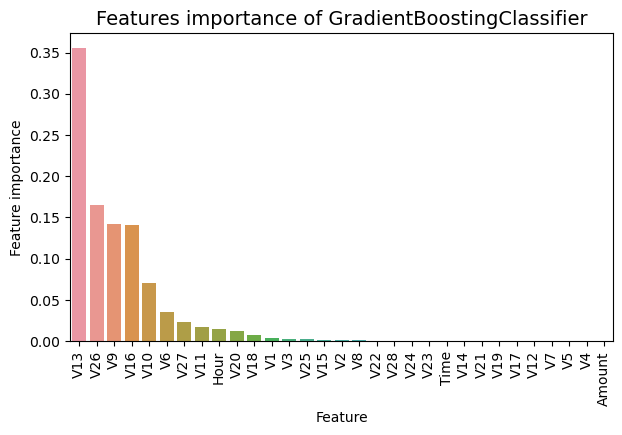

DecisionTreeClassifier Model Feature Importance: 



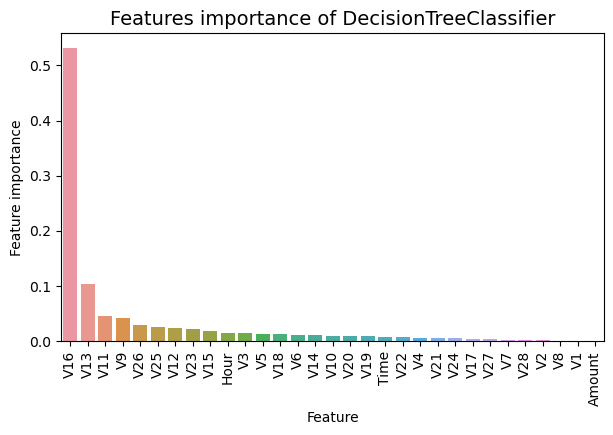

In [16]:
# for all models

models = [rfc, xgb, lgb, gbc,svc,dtc, lr]

target = 'Class'
predictors = ['Time',"Hour", 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

for model in models:
    # there is no feature importance attribute in SVC and Logistic regression
    if model == svc or model == lr:
           continue
    print(type(model).__name__, "Model Feature Importance: \n")
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (7,4))
    plt.title('Features importance of '+type(model).__name__,fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()   

# PCA Visualization

Text(0.5, 1.0, 'PCA: 2 Component')

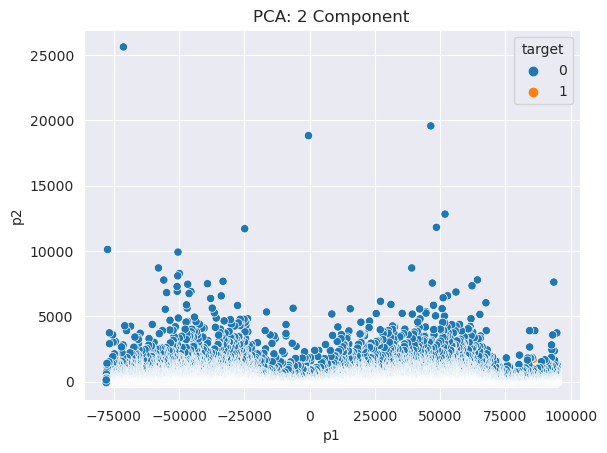

In [17]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)

#visualization of reduced data:
sns.set_style("darkgrid")
pca_data=pd.DataFrame(X_reduced,columns=["p1","p2"])
pca_data["target"]=y
sns.scatterplot(x="p1",y="p2",hue="target",data=pca_data)
plt.title("PCA: 2 Component")

# AUC-ROC Curve

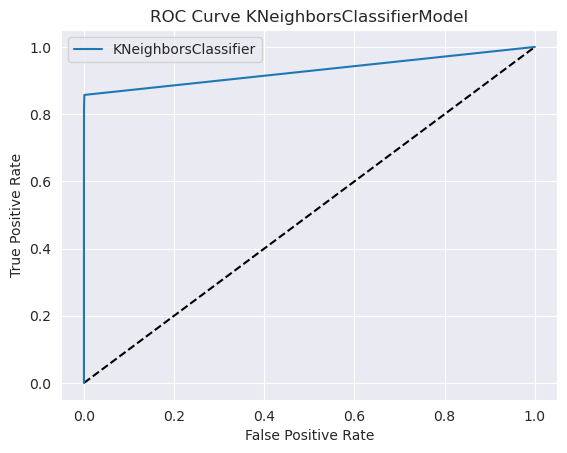

KNeighborsClassifier Model AUC Score is:  0.9284615172039553


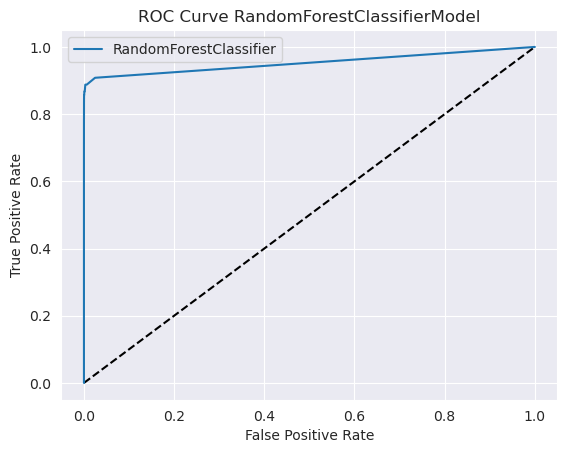

RandomForestClassifier Model AUC Score is:  0.9525678166595846


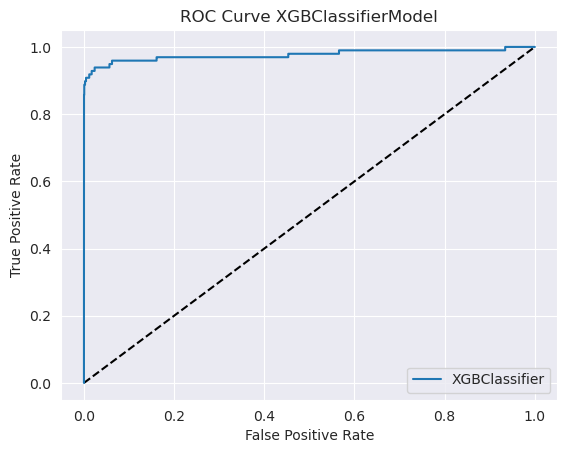

XGBClassifier Model AUC Score is:  0.9765796372009692


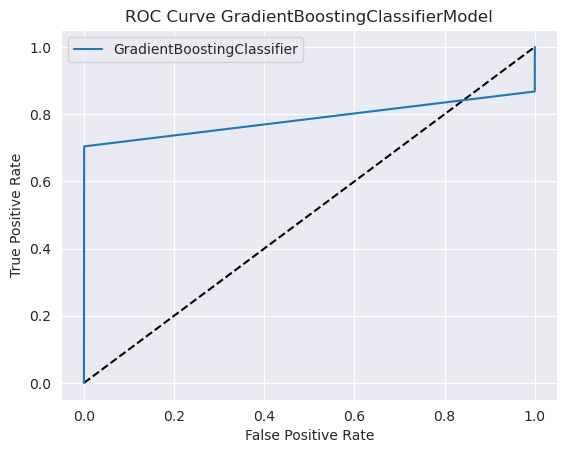

GradientBoostingClassifier Model AUC Score is:  0.7855107029446556


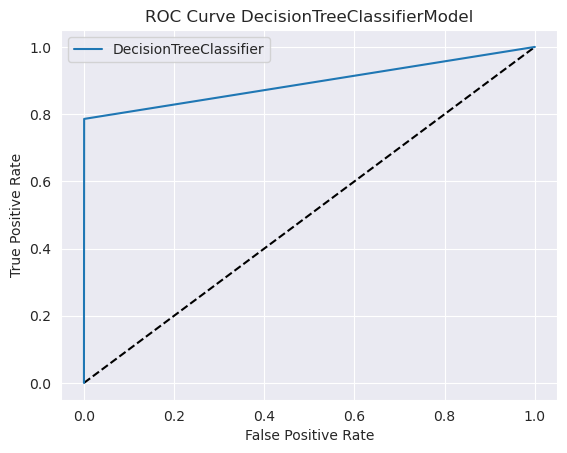

DecisionTreeClassifier Model AUC Score is:  0.8926373201221963


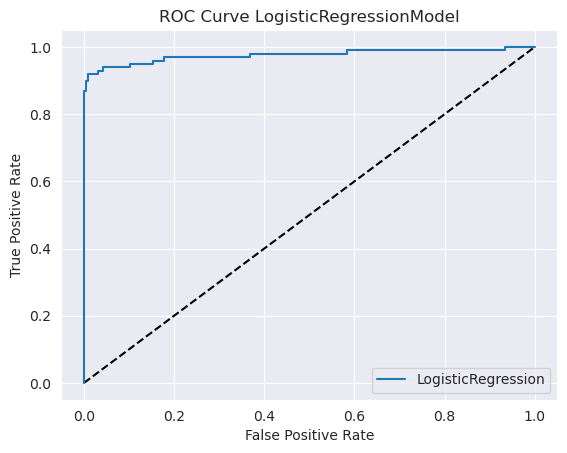

LogisticRegression Model AUC Score is:  0.9751189375581408


In [18]:
from sklearn.metrics import roc_curve, auc

models = [knn, rfc, xgb, gbc, dtc, lr]

for model in models:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label=type(model).__name__)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve "+type(model).__name__+"Model")
    plt.legend()
    plt.show()
    print(type(model).__name__, "Model AUC Score is: ", auc(fpr, tpr))

# Conclusion:
I investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated ten predictive models. The data was split in 2 parts, a train set and a test set.

I have evaluated the performance of the models using the AUC-ROC curve and other metrics. The best results were obtained with XGBoost, with an AUC score of 0.97 and a accuracy of 0.9996.